In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
from pandas.io.json import json_normalize
from datetime import datetime

yourName = 'Luke Russell'
theirName = ''

In [283]:
with open(f'/home/luke/Downloads/fb/messages/inbox/{theirName}/message_1.json') as file:
    jsonLoad = json.load(file)
dfPerson = json_normalize(jsonLoad['messages'])

###if sender_names.unique == 2... so we dont deal with groups yet

members = dfPerson['sender_name'].unique()
for i in range(0,len(members)):
    if members[i] != yourName:
        person = members[i]
firstName, *middleName, lastName = person.split()

dfPerson['person'] = firstName + ' ' + lastName

dfPerson['direction'] = np.nan
dfPerson.loc[dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'sent'
dfPerson.loc[~dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'received'


dfPerson['date'] = dfPerson['timestamp_ms']/1000
dfPerson['date'] = dfPerson['date'].astype(int)
dfPerson['date'] = pd.to_datetime(dfPerson['date'], unit='s')
dfPerson['day'] = dfPerson['date'].dt.to_period('d')
# future: format="%Y.%d.%m %I:%M:%S",

In [291]:
#dfPerson.head()

In [287]:
sent = list(dfPerson[dfPerson['direction'] == 'sent']['date'])
received = list(dfPerson[dfPerson['direction'] == 'received']['date'])

TypeError: 'Series' object is not callable

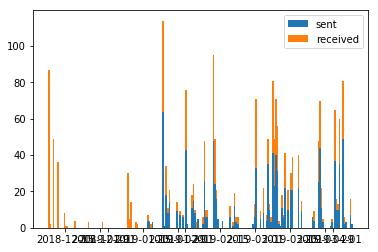

In [289]:
plt.figure()
plt.hist([sent[:1000], received[:1000]], label=['sent','received'], bins = 200, stacked=True)
#sent and receive aren't perfectly equal, need a better way to specify date range
plt.legend()